In [1]:
import pandas as pd
import numpy as np

D:\Software_Location\envs\Air\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Software_Location\envs\Air\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
D:\Software_Location\envs\Air\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#function to convert dataframe to into 2d array
def convert_2d(df_dup):
    data_frame = pd.DataFrame()
    for i in range(0, df_dup.shape[0]-59):
        is_anomaly = False
        mylist = []
        for j in range(i, i+60):
            mylist.append(df_dup['value'].iat[j])
            if df_dup['is_anomaly'].iat[j] == 1:
                is_anomaly = True
        if is_anomaly:
            mylist.append(1)
        else:
            mylist.append(0)
        np_Array = np.array(mylist)
        mylist = np_Array.T
        data_frame = data_frame.append(pd.Series(mylist), ignore_index=True)
    return data_frame;

What is Anomaly????

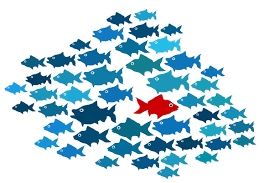



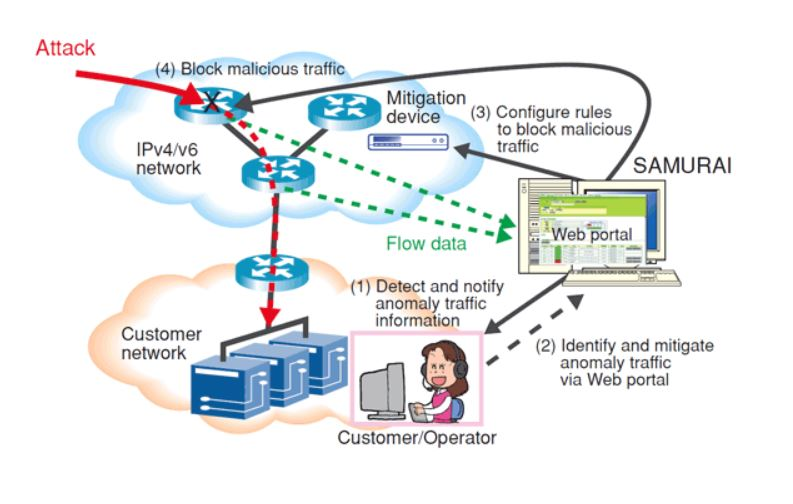

Data Source : https://github.com/harris0704/nbaData16-17/tree/master/Yahoo_S5_Data

In [3]:
#view of a sample of data
df=pd.read_csv("C:\\Users\\hp\\Music\\Dataset\\real_1.csv")
df.head()

,timestamp,value,is_anomaly
0,1,0.000000,0
1,2,0.091758,0
2,3,0.172297,0
3,4,0.226219,0
4,5,0.176358,0


In [4]:
#for concatenating all the files and
#Preprocessing the data
from sklearn import preprocessing
import glob
path = r'C:\\Users\\hp\\Music\\Dataset' #set the path accordingly
all_files=glob.glob(path+"\\*.csv")

dataset_conc=[]
for filename in all_files:
  df=pd.read_csv(filename,index_col=None,header=0)
  df=df.replace(0,np.nan)
  df=df.dropna(axis=0, how='any',subset=['value'])
  df.value = preprocessing.normalize([df.value]).T
  dataset_conc.append(convert_2d(df)) 
frame=pd.concat(dataset_conc,axis=0,ignore_index=True)


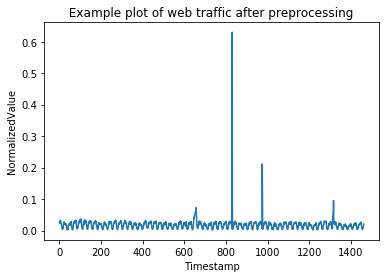

In [5]:
import matplotlib.pyplot as plt
plt.plot(df.timestamp,df.value)
plt.xlabel("Timestamp")
plt.ylabel("NormalizedValue")
plt.title(" Example plot of web traffic after preprocessing ")
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Flatten,MaxPooling1D,Conv1D,LSTM
from keras import optimizers

Using TensorFlow backend.


In [7]:
#building a classifier
model=Sequential()
model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='tanh',input_shape=(60, 1)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='tanh'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Reshape((1,15*64)))
model.add(LSTM(150, activation='tanh',return_sequences='False'))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 60, 32)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 64)            10304     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 960)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            666600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 150)              

In [8]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.023933,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,...,0.023166,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.0
1,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,...,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.0
2,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,...,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.0
3,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,...,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0.0
4,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,0.022919,...,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0.006319,0.0


In [9]:
#train test split
y=frame.iloc[:, 60]
X=frame.iloc[:, 0:60]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [10]:
#reshaping the data 
X_train=X_train.to_numpy()
nrows, ncols = X_train.shape
X_train = X_train.reshape(nrows, ncols, 1)

X_test=X_test.to_numpy()
nrows, ncols = X_test.shape
X_test = X_test.reshape(nrows, ncols, 1)

y_test = y_test.to_numpy()


In [11]:
#converting y_train to categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train)

In [12]:
#train the model
history=model.fit(x=X_train,
                  y=y_train,
                  batch_size=512,
                  epochs=100,
                  verbose=1)

Epoch 1/100
62107/62107 [==============================] - 8s 132us/step - loss: 0.3335 - accuracy: 0.9035
Epoch 2/100
62107/62107 [==============================] - 8s 128us/step - loss: 0.2815 - accuracy: 0.9120
Epoch 3/100
62107/62107 [==============================] - 8s 128us/step - loss: 0.2655 - accuracy: 0.9187
Epoch 4/100
62107/62107 [==============================] - 8s 132us/step - loss: 0.2443 - accuracy: 0.9241
Epoch 5/100
62107/62107 [==============================] - 8s 131us/step - loss: 0.2388 - accuracy: 0.9252
Epoch 6/100
62107/62107 [==============================] - 8s 130us/step - loss: 0.2359 - accuracy: 0.9256
Epoch 7/100
62107/62107 [==============================] - 8s 131us/step - loss: 0.2325 - accuracy: 0.9263
Epoch 8/100
62107/62107 [==============================] - 8s 132us/step - loss: 0.2318 - accuracy: 0.9257
Epoch 9/100
62107/62107 [==============================] - 9s 149us/step - loss: 0.2265 - accuracy: 0.9280
Epoch 10/100
62107/62107 [===========

62107/62107 [==============================] - 10s 162us/step - loss: 0.0415 - accuracy: 0.9868
Epoch 77/100
62107/62107 [==============================] - 10s 164us/step - loss: 0.0411 - accuracy: 0.9872
Epoch 78/100
62107/62107 [==============================] - 10s 166us/step - loss: 0.0410 - accuracy: 0.9870s - loss: 0.0406 - accu
Epoch 79/100
62107/62107 [==============================] - 10s 167us/step - loss: 0.0390 - accuracy: 0.9876
Epoch 80/100
62107/62107 [==============================] - 10s 162us/step - loss: 0.0380 - accuracy: 0.9882
Epoch 81/100
62107/62107 [==============================] - 10s 162us/step - loss: 0.0390 - accuracy: 0.9876
Epoch 82/100
62107/62107 [==============================] - 10s 162us/step - loss: 0.0380 - accuracy: 0.9882
Epoch 83/100
62107/62107 [==============================] - 10s 165us/step - loss: 0.0369 - accuracy: 0.9880
Epoch 84/100
62107/62107 [==============================] - 10s 166us/step - loss: 0.0360 - accuracy: 0.9887
Epoch 85/

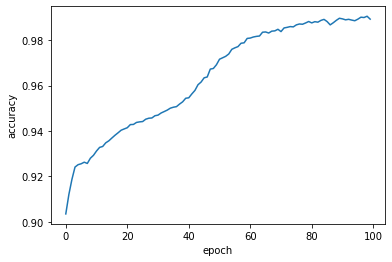

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
  # list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


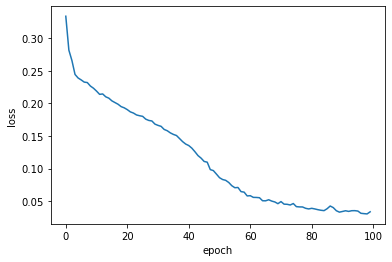

In [15]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
 #predicting on test data
y_pred=model.predict_classes(X_test)

In [17]:
#evaluate performance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1_Score = f1_score(y_test, y_pred, average='binary')

In [18]:
print("Confusion_Matrix")
print(Confusion_Matrix)
print("Accuracy ", Accuracy)
print("Precision ", precision)
print("recall ", recall)
print("f1_score ", F1_Score)

Confusion_Matrix
[[23049   937]
 [ 1102  1530]]
Accuracy  0.9233977008039672
Precision  0.620186461289015
recall  0.581306990881459
f1_score  0.6001176701313983


In [22]:
model.save("Model.h5")